# Simulation of a Volleyball Game
By Gong Cheng, Ziyang Zhang, Michael Grandel

### Problem Statement 
Given a roster of 12 real life players, determine which combination of 6 players will maximize your chances of winning the volleyball game. Let's assume
this is not an adversarial simulation; the opponent has a known and fixed set of 6 players.

### Players
Each player will be rated on their skills. Skills include:

1. Digging / Passing / Bumping
2. Setting
3. Spiking / Hitting / Attacking
4. Serving
5. Blocking

Therefore, composing a team of 6 will involve figuring out which combination
of skills and ratings are optimal based on the opponents combination of 6.

---
TEAM NOTES:
We should first just start with getting 12 players (6 for us and 6 for the
opponent) and then simulate the game. So, we need to figure out:
1. How to get the data / ratings \
  a. Players have real data on their performance. We should somehow convert that
  data to a rating. Or figure out how to work with the raw data.
--- 
# Rules of the Game
Before diving into the details of the skills and simulation, it is first important to lay out the basic rules of the game, and also the rules we will be using for this simulation. This simulation can expand greatly by invoking more and more rules, so not every single rule is involved. 

### Basics of points

1. The main idea is, if the ball is on your side of the court - you must NOT let it touch the ground. If it does, the you lose the round. However, if the other team gets the ball over the net and into your side of the court, and the ball lands outside of the court boundaries, then you win the round. 

2. If the ball was indeed going outside the court, but you still chose to touch the ball (on accident or not), then the ball is now considered yours and you must get it over the net. 

3. Your team has 3 touches to get the ball over the net. If on the 3rd touch the ball does not make it over the net and into the other team's court, you lose the point. Note, you can get it over on the first, second, or third. Generally though, the game flows by using all three touches. 

4. If you touch the ball, you may not touch the ball again until someone else on your team touches it. So if you're the first touch, you cannot be the second. But, you can be the third. Another example is if you're the second touch, you cannot touch the ball again (because that mean you either touched the 3rd time, which is a consecutive touch, or you touched the 4th time, which is over the touch limit). If you do happen to touch it a second time, your team loses the round.

5. The net cannot be touched by any player. If you touch the net, you lose the point. However, the ball is allowed to touch the net. Say your team uses the first touch to pass the ball and accidentally passes it into the net. You still are allowed to use a second touch to pass the ball, but you must be careful to not touch the net. If you used the third touch and got the ball into the net, you ran out of touches so you cannot save the ball with a fourth touch, and so it'll fall down onto your side and you lose the round.

### Positioning
A court is a rectangle with a net down the middle, so the court is split in half
for two teams. Before each round (when the person serves), players will have to start on the x-marked positions. 

_Note: In a real game, players are actually able to start off in slightly more perturbed positions._

https://drive.google.com/file/d/1QAmxTEsGvlFppOs0TPLzxv9KMnrzha6V/view?usp=sharing

When a round ends, if the team serving is a new team serving, then that team rotates one position clockwise. 

Ex: If team 1 serves and get's the point at the end of the round, then they are serve again. So, the team DOES NOT rotate. If the next serve they lose the point, team 2 is the new serving team. So team 2 rotates and then proceeds to serve. 

### Service
Pick a team and face the net. The player in the bottom right corner is the person who will serve. They are to step behind the line and serve the ball across the net. There are many different ways to serve, but we will be assuming that all players serve the same way. If the ball lands on your side of the court, then you lose the point. If the ball lands inside the opponents court, then you win the point (this is called an ace).

During this time, the opponents are NOT allowed to jump (hence no blocking). In volleyball, a jump is considered jumping high enough that your arm could reach over the net. Yes, this does mean that for shorter people, there is more leeway.
This rule is more subjective to the referee, since the main idea is the opponent cannot block or use an attack on the first hit. 

<b> For our simulation, we will assume that the the players will only be allowed to pass as the first touch after a service. </b>

### Passing
Passing is what people typically imagine is a volleyball move. This is when you bring your forearms together to 'bump' the ball up. Typically, the first touch a team makes is from recieving a powerful attack / serve. Therefore, passing is aimed to absorb a lot of the power, bring the ball up in the air, and pass it to one of your teammates (typically the setter). 

Sometimes, the technique is bad or the attack is so powerful, that the pass fails. Either no one on the team gets to the ball fast enough, or they manage to touch the ball, but it bounces off into a completely wrong direction. This is called a 'shank'. It is really difficult to save a shank via the second touch.

<b> For our simulation, if a person shanks the ball, we will assume no teammate is able to save it and the point is lost. </b>


### Setting 
If the pass is successful, then the second touch is typically a set. This is when the person uses their fingers to pass the ball with much more control. This ball is passed to a teammate who is ready to attack. Hence, the setter sets their team up for a strong attack. 

Sometimes, the technique is bad. The ball can fall through the hands/finger tips and touch the floor or body (hence either you lost the point, or the person touched the ball twice and lost the point). Also, sometimes the person may set poorly and use what's called a double touch (so touching the ball twice, very rapidly). This is when the person may push one hand a little faster than the other. This is easy to see when the ball spins in the air after a set for more than 1.5 rotations. Lastly, the person may end up holding the ball for a bit too long rather than a quick pass/touch off the hands. Holding the ball is illegal and also losses the point.

<b> For our simulation, we assume that a bad set will be caught by the referee always and the team will lose a point. </b>

Technically, setters can also be offensive and get 'kills' - the same kind, by name, as the attackers get. Sometimes a setter can trick the opponents into thinking the setter will set, but do a very quick and light attack at the very last second (sometimes just tipping the ball over the net). It is challenging to get a successful tip/kill as a setter, but it is still done enough to be statistically valid. However....

<b> For our simulation, we will assume setters can only set the ball </b>
### Attacking
Attacking / Spiking is typically the 3rd touch of the ball. Players who are designated to attack typically get in strategic positions right after or before the first touch. These positions allow them to ramp up speed and momentum, in order to jump high and hit the ball very fast over the net. The setter typically sets the ball up to the attacker, and the attacker rushes in and has to swat the ball down midair over the net. 

Attackers are typically always at the front side of their team (near the net), since that makes it easier to swat the ball down and over the net. The ball needs to go fast, so it can't go upwards - otherwise it'll land outside the bounds of the opponents court. So it must go downwards, hence the closer to the net, the less of a jump is expected. Rarely, a person is able to attack from the back side of the court. There is another line on the court that represents this division. These players are not allowed to jump after the line, but they are allowed to jump before and over the line. Making such an attack isn't easy though since you must jump much higher. 

<b> For our simulation, we will assume that only the front players are going to attack. </b>

Attacks are typically expected to be smart. They are expected to win the point for your team by making the opponents shank, have difficulty recieving the ball, or just not being able to get the first touch. So a 'bad' attack is one that is weak or not smart. However, it does not lose the point.

Sometimes, however, the attacker can hit the ball into the net (or out of bounds). If it hits the net, your teammates cannot pick it up as the 4th touch and so it must land on your side of the court and hence lose the point. 

Or, due to how close the attackers are to the net to accomodate jump height, sometimes the attackers can fly into the net or touch the net as they swing the ball down. As such, they touched the net and lose the point. 

<b> For our simulation, we will assume a 'bad' attack results in this and the team loses the point. </b>


### Blocking
Blocking is done by the team that will be recieving the attack. So, suppose the opponent is attacking the ball. Your front-players are allowed to jump and block the attack with their arms/hands. Imagine them raising a fence. Blocks create a lot of flexibility in the game. Typically, if your block is successful, the attacker will hit the ball into your block and then the ball lands back in their court. Note, however, this means you technically touched the ball, and used your first touch to pass the ball back over. As such, when you block, the three touches for your opponents reset. Hence, they can use their first touch again to try to pick up the ball you blocked. 

Sometimes however, the block will fail. Say you did block, but your block made the ball land out of bounds of the opponents court - hence you lost the point.

Either the block did not touch the ball at all, or the ball touched the block but rolled off the fingers or somehow bounced onto your side of the court. _If a block touches a ball, but the ball still is on your side of the court, your team still has 3 touches_. Hence, blocks do not count as a touch towards the count.

Sometimes, the positioning of your arms and hands is not great during a block, and so the ball can ricochet so far that your teammates cannot catch up to it and use the first touch to recieve the ball. Or it can ricochet entirely downward onto your side of the court, and hence you lose the point.

<b> For our simulation, we will assume a 'bad' block results in your block landing out of bounds or inside your own court, and hence you lose the point. 

We will also assume a 'successful' block does result in a point. Note, a block can be neither bad nor successful, if the block misses the ball or ball goes over the block. Hence, the ball continues to play normally (the blocking team will be expected to recieve the ball). </b>

----
# Simulation and Probabilities

We need to now determine the probabilities of success and fail, by each player, for each action. This probability can start of uniform, but could transform into something more realistic (a function of the players position, the ball's position, the players stamina, and skill rating). This is how the project can evolve over time - by minimizing assumptions made above, incorporating more rules and plays, and producing more realistic distributions.


### The Players
The players we will use are players participating in NCAA Division 1 over the past years. Their statistics are presented here: 
http://www.ncaa.org/championships/statistics/mens-volleyball-statistics

(Another example: http://stats.ncaa.org/rankings/change_sport_year_div)

In order to make things interesting, we want players with various skills or a uniqueness to their abilities. Since we will be building a roster of 12, we want about 2 players who are 'masters' in each skill (5 skills, so 10 players), and 2 more players who are more well rounded or have a unique skill distribution.

In real life volleyball, each player often has a designated role. 

  1. Middles focus on attacking and blocking, and so often a middle is best at this and not so great at the other skills. They play at the middle front of the net.

  2. Outsides focus on attacking, and have a little bit of defense (digging), so often an outside is best at attacking. They play at the upper left corner of the net.

  3. Setters focus on setting, and have little to no offense (attacking), so often a setter is best at setting. They play between the upper right corner and middle of the net. Though they are expected to also play defense when the opponent will attack, so setters often have to run around the court a lot. 

  4. Opposites are usually more averaged out players. They are used often to surprise the opponent with unusual tactics. They are generally well averaged players, who focus mainly on attacking, but are often the second line of defense or the second setters incase something happens to the main setter (say he trips or can't make it to the ball). They play at the upper right corner of the net.

  5. Liberos are purely defensive and cannot attack. We did not incorporate these players into our assumptions because the rules for them are a bit different. But, we will assume that there are defensive specialists (often opposites) who are weaker at hitting but really good at digging/defense. Liberos often play at the middle back. 

The idea of the above is to show that each player's stats will generally be a representation of their position. So each player will often be 'masters' in one skill set. Those that seem to be averaged out are likely to be opposites or so. 

As for the probabilities, these initial data sets only feature the probabilities IF everything goes right. If the player is ready, at the right place, at the right time, etc. We will incorporate a lot of other factors, such as position of the player, to the true probability of success or fail of an action.

The final probability will be:

$$ P(Success) = \sum_n\alpha_np_n(success)$$

So it will be a weighted sum of some hyper parameters for each probability of success for a specific condition. 

Upload this zip file for the code cell below. It currently has a list of players and extrapolates their stats.

https://drive.google.com/file/d/1itj7Kllfn_YwAMisEsYUsgCPlhBAEs7v/view?usp=sharing

# All Necessary Imports


In [ ]:
import numpy as np


import scipy.special as spsp
import scipy.stats as spst

import matplotlib.pyplot as plt

%matplotlib inline

import sympy

!pip install simpy
import simpy

import copy

import pandas as pd
import zipfile
import os

# Data Collection Step

Michael Grandel, Dec 20

In [ ]:
# Upload the zip file, players.zip, and run this to extract the data
with zipfile.ZipFile("players.zip","r") as zip_ref:
    zip_ref.extractall("players")

files = [f for f in os.listdir('./players') if os.path.isfile('./players/'+f)]

player_data = {}
for f in files:
  player_name = f[:len(f)-4] # Get rid of the .csv tag
  player_data[player_name] = pd.read_csv('players/' + f).fillna(0)


''' Some Assumptions 
1) For serves. The data does not show the total number of serves done. Let's 
assume that for each set (game to 25 points), each player three times. Hence,
the total serves are 3*S. This assumption comes from:
  a) Some sets are really close, and so a total of ~50 serves must happen. So 
  if there are 12 players, it may seem like a good idea to do 4 serves each. 
  b) But some sets are not that close, so the average should be a little less 
  than 4. 
  c) Sometimes if a team reaches 24-24, then the game enters a different phase.
  The first team to score a 2 point lead wins. So, say team A scores. They now
  have 25-24. But the game is not over. They must score again, getting 26-24. 
  Sometimes the score just keeps going back and forth and winning scores in this
  situation reach 27-30 points. 
  -- Putting these together, 3 serves each seems like a fair assumption, on
  average.


Error rate: SErr/3*S
Ace rate: Ace/3*S
Non-Error : 1 - Error Rate - Ace Rate


2) For setting. The data does not show the total number of setting errors. 
Successful sets are shown as 'Assists', which is another word for sets. 
We will determine set success rate by a reference point. We will find the best
setter (the one with the most assists) and assume they have a 5% setting error
rate (It is common that for good setters, every 20 sets, there will be 
1 setting error).  The rest of the setters/assists will be compared to this 
reference point to determine the setting success rate. Indeed, lots of people 
will be bad at setting. This isn't an easy skill unless trained intensly.

3) For blocks, we will assume that:
  - Block Solos is considered a successful block (one where the blockign team gets
  the point)
  - Block Assists is considered a block that still results in the ball being in play
  on the blocking-teams side. 
  - Sometimes the block can fail in a way that the ball goes out of bounds. We
  will consider this scenerio happens 10% of the block-assists. This isn't recorded,
  but can be simulated by removing some assumptions we are making and producing
  a more realistic game (by factoring in that the ball may still end up on the 
  enemies' side and can still be in play).
  - Block Err is considered a fail block due to error such as touching the net
  and the blocking team loses the point.
'''

player_skills = {}

best_set_num = 0
best_setter = ""

for player in player_data:
  skills = \
  {
      "Service": 
      { 
          'Error Rate': 0,
          'Ace Rate': 0,
          'Success Rate': 0,  
      },
      'Attack':
      {
          'Success Rate': 0,
          'Kill Rate': 0,
          'Error Rate': 0,
      },
      'Pass':
      {
          'Success Rate': 0,
          'Error Rate': 0,
      },
      'Block':
      {
          "Success Rate": 0,
          "Error Rate": 0,
          "Assist Rate": 0,
      },
      "Set":
      {
          "Success Rate": 0,
          "Error Rate": 0,
      }
  }

  player_info = player_data[player]
  # Last row features the total values
  l_index = len(player_info.axes[0]) - 1
  row = player_info.loc[l_index]

  ########### Services ############
  total_services = row["S"]*3
  ser_err = row["SErr"]/total_services
  ace = row["Aces"]/total_services

  skills["Service"]["Error Rate"] = ser_err
  skills["Service"]["Ace Rate"] = ace
  skills["Service"]["Success Rate"] = 1 - ser_err - ace
  
  ########### Attacks ############
  total_attacks = int(row["Total Attacks"])
  kill_rate = row["Kills"] / total_attacks
  error_rate = row["Errors"] / total_attacks
  success_rate = 1 - kill_rate - error_rate

  skills["Attack"]["Success Rate"] = success_rate
  skills["Attack"]["Kill Rate"] = kill_rate
  skills["Attack"]["Error Rate"] = error_rate

  ########### Passing #############
  digs = row["Digs"]
  dig_errors = row["RErr"]
  total = digs + dig_errors
  dig_rate = digs/total
  dig_err_rate = dig_errors/total

  skills["Pass"]['Success Rate'] = dig_rate
  skills["Pass"]['Error Rate'] = dig_err_rate

  ########### Blocking ##########
  solo_blocks = row["Block Solos"]
  block_assists = row["Block Assists"]
  block_err = row["BErr"]
  total = solo_blocks + block_assists + (int)(0.1*block_assists) + block_err
  block_success_rate = solo_blocks/total
  block_error_rate = (block_err + (int)(0.1*block_assists)) / total
  block_assist_rate = block_assists/total

  skills["Block"]["Success Rate"] = block_success_rate
  skills["Block"]["Error Rate"] = block_error_rate
  skills["Block"]["Assist Rate"] = block_assist_rate

  ########## Sets ############
  # Final calculation happens at the end
  assists = row["Assists"]
  if assists > best_set_num:
     best_set_num = assists
     best_setter = player

  skills["Set"]["Success Rate"] = assists

  ### Set skills for each player ###
  player_skills[player] = skills

# Now we calculate the setting
for player in player_skills:
  
  if player == best_setter:
    player_skills[player]["Set"]["Success Rate"] = 0.95
    player_skills[player]["Set"]["Error Rate"] = 0.05
  else:
    player_skills[player]["Set"]["Success Rate"] = player_skills[player]["Set"]['Success Rate'] / best_set_num
    player_skills[player]["Set"]["Error Rate"] = 1 - player_skills[player]["Set"]["Success Rate"]

In [ ]:
### If you'd like to see the data
for player in player_skills:
  print(player)
  print(player_skills[player])

Kyle Piekarski
{'Service': {'Error Rate': 0.09895833333333333, 'Ace Rate': 0.03819444444444445, 'Success Rate': 0.8628472222222222}, 'Attack': {'Success Rate': 0.3015151515151515, 'Kill Rate': 0.5727272727272728, 'Error Rate': 0.12575757575757576}, 'Pass': {'Success Rate': 0.9642857142857143, 'Error Rate': 0.03571428571428571}, 'Block': {'Success Rate': 0.04678362573099415, 'Error Rate': 0.15204678362573099, 'Assist Rate': 0.8011695906432749}, 'Set': {'Success Rate': 0.003946329913180742, 'Error Rate': 0.9960536700868192}}
Quinn Isaacson
{'Service': {'Error Rate': 0.12698412698412698, 'Ace Rate': 0.03968253968253968, 'Success Rate': 0.8333333333333334}, 'Attack': {'Success Rate': 0.4032258064516129, 'Kill Rate': 0.5, 'Error Rate': 0.0967741935483871}, 'Pass': {'Success Rate': 1.0, 'Error Rate': 0.0}, 'Block': {'Success Rate': 0.14285714285714285, 'Error Rate': 0.12857142857142856, 'Assist Rate': 0.7285714285714285}, 'Set': {'Success Rate': 0.531965272296764, 'Error Rate': 0.46803472770

# Initial Model Set Up

Ziyang Zhang, DEC 27

I tried to build a round of simulation of the game in terms of ONLY `ACTIONS` from each team below:
`Block` is a tricky one that needs to be defined more carefully, since a successful block may change the sequence of the actions

A round of simulation will END whenever `LOST` happens.

All five actions can directly lead to `LOST` on their own during the simulation.

This system below is only meant to simulate the sequence of 5 actions for one round of a game. The simulation stops when one of the team scored/lost.

In [ ]:
# treat 6 players' ratings only as the SUCCESS RATES of the actions
# ONLY 10 ratings as INPUTS of the system for 1 round of simulation
    # however, we have 12 players... 
    # maybe set each player into only 1 role? 
    # for a position that has more than two players, take the average of their ratings?

def serving(env,stop,start_team,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2):
  t=start_team
  print('team: ', t, 'serving')
  u=np.random.rand()
  print(u)
  # team 1 is serving
  if t==1:
    if u>serve_1:
      print('serving out of bounds')
      print('team ',t,' LOST!')
      stop.succeed()
      yield stop
    else:
      print('serving in bounds')
      t=2
      print('ball goes to team ',t,' for passing')
      yield env.process(passing(env,stop,t,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2))
  
  # team 2 is serving
  else:
    if u>serve_2:
      print('serving out of bounds')
      print('team ',t,' LOST!')
      stop.succeed()
      yield stop
    else:
      print('serving in bounds')
      t=1
      print('ball goes to team ',t,' for passing')
      yield env.process(passing(env,stop,t,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2))

def passing(env,stop,t,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2):
  print('team: ', t, 'passing')
  u=np.random.rand()
  print(u)

  # team 1 is passing
  if t==1:
    if u>pass_1:
      print('passing failed')
      print('team ',t,' LOST!')
      stop.succeed()
      yield stop
    else:
      print('passing successful')
      print('ball goes to team',t,' for setting')
      yield env.process(setting(env,stop,t,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2))

  # team 2 is passing
  else:
    if u>pass_2:
      print('passing failed')
      print('team ',t,' LOST!')
      stop.succeed()
      yield stop
    else:
      print('passing successful')
      print('ball goes to team',t,' for setting')
      yield env.process(setting(env,stop,t,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2))

def setting(env,stop,t,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2):
  print('team: ', t, 'setting')
  u=np.random.rand()
  print(u)

  # team 1 is setting
  if t==1:
    if u>set_1:
      print('setting failed')
      print('team ',t,' LOST!')
      stop.succeed()
      yield stop
    else:
      print('setting successful')
      print('ball goes to team',t,' for attacking')
      yield env.process(attacking(env,stop,t,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2))

  # team 2 is setting
  else:
    if u>set_2:
      print('setting failed')
      print('team ',t,' LOST!')
      stop.succeed()
      yield stop
    else:
      print('setting successful')
      print('ball goes to team',t,' for attacking')
      yield env.process(attacking(env,stop,t,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2))

def attacking(env,stop,t,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2):
  print('team: ', t, ' attacking')
  u=np.random.rand()
  print(u)

  # team 1 is attacking
  if t==1:
    if u>attack_1:
      print('attacking out of bounds')
      print('team ',t,'LOST!')
      stop.succeed()
      yield stop
    else:
      t=2
      print('attacking in bounds')
      print('ball goes to team',t,' for blocking')
      yield env.process(blocking(env,stop,t,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2))

  # team 2 is attacking
  else:
    if u>attack_2:
      print('attacking out of bounds')
      print('team ',t,'LOST!')
      stop.succeed()
      yield stop
    else:
      t=1
      print('attacking in bounds')
      print('ball goes to team',t,' for blocking')
      yield env.process(blocking(env,stop,t,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2))



# in the process of `blocking`:
    # the block rating: block_1/block_2 is being compared to `np.random.rand()` twice
        # 1st time: to determine if the block goes out of bounds, thus LOST immediately
        # 2nd time: once the block goes in bounds, to determine if the block successfully block back the ball

def blocking(env,stop,t,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2):
  print('team: ',t,' blocking')
  u=np.random.rand()
  print(u)

  # team 1 is blocking:
  if t==1:
    if u>block_1:
      print('blocking out of bounds')
      print('team ',t,' LOST!')
      stop.succeed()
      yield stop
    else:
      print('blocking in bounds')
      v=np.random.rand()
      print(v)
      if v>block_1:
        print('block back failed')
        print('ball goes to team ',t,' for passing')
        yield env.process(passing(env,stop,t,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2))
      else:
        print('block back successful')
        t=2
        print('ball goes to team', t, ' for passing')
        yield env.process(passing(env,stop,t,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2))

  # team 2 is blocking:
  else:
    if u>block_2:
      print('blocking out of bounds')
      print('team ',t,' LOST!')
      stop.succeed()
      yield stop
    else:
      print('blocking in bounds')
      v=np.random.rand()
      print(v)
      if v>block_2:
        print('block back failed')
        print('ball goes to team ',t,' for passing')
        yield env.process(passing(env,stop,t,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2))
      else:
        print('block back successful')
        t=1
        print('ball goes to team', t, ' for passing')
        yield env.process(passing(env,stop,t,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2))


def system(start_team,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2):
  env=simpy.Environment()
  stop=env.event()
  env.process(serving(env,stop,start_team,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2))
  env.run(stop)

In [ ]:
# again, these 10 ratings below are randomly generated for testing the simulation above
# each rating is for the team overall, not a specific player, 
# since we haven't defined how a player is selected to perform each action during the process of the game
    
    # to further complete the simulation of 1 round of a game
    # Either: we need to find a way to transform players' real statistics into these 10 ratings
    # OR: we use players' detailed statistics separately to replace these 10 ratings to determine the result of each action and add complexity

# 5 random ratings for each team, two team have different mean and std
serve_1=np.random.normal(70,10)/100
serve_2=np.random.normal(60,15)/100
pass_1=np.random.normal(70,10)/100
pass_2=np.random.normal(60,15)/100
set_1=np.random.normal(70,10)/100
set_2=np.random.normal(60,15)/100
attack_1=np.random.normal(70,10)/100
attack_2=np.random.normal(60,15)/100
block_1=np.random.normal(70,10)/100
block_2=np.random.normal(60,15)/100

# 5 ratings for each team
print('team 1:')
print(serve_1,pass_1,set_1,attack_1,block_1)
print('team 2:')
print(serve_2,pass_2,set_2,attack_2,block_2)

team 1:
0.6251293535987894 0.6243671074963711 0.9000191280158621 0.6568405615164872 0.729918548731927
team 2:
0.6871889173425089 0.4593415148544451 0.7945169992562896 0.5313384409993954 0.5772727814638023


Testing of the initial model

In [ ]:
# Start with team 1 
system(1,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2)

team:  1 serving
0.24553248790377658
serving in bounds
ball goes to team  2  for passing
team:  2 passing
0.40697570345417633
passing successful
ball goes to team 2  for setting
team:  2 setting
0.9368336532364594
setting failed
team  2  LOST!


In [ ]:
# Start with team 2
system(2,serve_1,pass_1,set_1,attack_1,block_1,serve_2,pass_2,set_2,attack_2,block_2)

team:  2 serving
0.6733497793060225
serving in bounds
ball goes to team  1  for passing
team:  1 passing
0.6189136430518211
passing successful
ball goes to team 1  for setting
team:  1 setting
0.5060760399710154
setting successful
ball goes to team 1  for attacking
team:  1  attacking
0.2092077413644554
attacking in bounds
ball goes to team 2  for blocking
team:  2  blocking
0.8307042341168063
blocking out of bounds
team  2  LOST!


# Final Simulation Model

Gong Cheng, Dec 28

The model below can simulate a whole game of volleyball. Whenever a team scored/lost a point, either the winning team keeps serving or the losing team gives away the serving right and the game continues until a team hits 25 points and leads by at least 2 points.

The model is still based on the simulation of the sequence of 5 actions, but much more complete.

Also, this model will return the 2 system outputs: winning rate of team 2 for 100 25-point games and average game length in seconds.

In [ ]:
### This part of code simulates the whole set up to 25 points and decide which team finally wins, the code
### allows for:
#   1)Rotation of players' position to decide setter within the team;
#   2)In each passing (attacking) process, passer (attacker) is randomly chosen from 5 players excluding the setter
#   3)Simulate for multiple times and calculate average rate to win for a specific team

### However, this system still suffers from several caveats and the following points need more attention:
#   1)Setter is assumed to never pass or attack, which during the real rally is not realisitc, setters sometimes do pass
#   2)Attackers are not discriminated according to whether they are in the front court, usually, the 2 or 3
#   attckers in the front usually get more chances to attack. Here I assume all five attackers are equally likely
#   3)Blocking is a too complicated process influenced by who are allowed to block, who actually blocks and 
#   how many blocks(could be 1 to 3), therefore, I used team average blocking data for each blocking process, 
#   that is, I leave out all the details except which team is blocking.
#   4) Team players' data have to be manually set up and changed, the process yet to be automated (but still 
#   good to use if our problem is not too complicated). 
#   5) When manaually constructing the team data, setter have to be the first in the strucutre according to my
#   construction and each team is assumed to start serving with setter

### If no further significant parts are added, I suggest we reduce the question to "Should the team change a setter or not" 
### instead of "Optimal combination" as the latter would involve much more times of simulation while the former is still worthy 
### of studying as setter is considered to be the most crucial part of a team during the rally. We could select setters with 
### different features,eg,one with excellent setting skill, one with good blocking and the other more balanced, and
### choose from the best of them with simulation. This is a very significant decision in the real game and our
### program could help in the decision-making process.


In [ ]:
# First I construct each player's data as a dictionary, here only 6 of them are used for testing
TM={'Service': {'Error Rate': 0.03819444444444445, 'Ace Rate': 0.024305555555555556, 'Success Rate': 0.9375}, 'Attack': {'Success Rate': 0.4666666666666667, 'Kill Rate': 0.32592592592592595, 'Error Rate': 0.2074074074074074}, 'Pass': {'Success Rate': 0.8937007874015748, 'Error Rate': 0.1062992125984252}, 'Block': {'Success Rate': 0.3, 'Error Rate': 0.3, 'Assist Rate': 0.4}, 'Set': {'Success Rate': 0.010655090765588003, 'Error Rate': 0.989344909234412}}
EC={'Service': {'Error Rate': 0.23943661971830985, 'Ace Rate': 0.14553990610328638, 'Success Rate': 0.6150234741784038}, 'Attack': {'Success Rate': 0.4094998200791652, 'Kill Rate': 0.4494422454120187, 'Error Rate': 0.14105793450881612}, 'Pass': {'Success Rate': 0.9435483870967742, 'Error Rate': 0.056451612903225805}, 'Block': {'Success Rate': 0.1059190031152648, 'Error Rate': 0.12461059190031153, 'Assist Rate': 0.7694704049844237}, 'Set': {'Success Rate': 0.056827150749802685, 'Error Rate': 0.9431728492501973}}
PC={'Service': {'Error Rate': 0.2485207100591716, 'Ace Rate': 0.09664694280078895, 'Success Rate': 0.6548323471400395}, 'Attack': {'Success Rate': 0.33127753303964763, 'Kill Rate': 0.5251101321585903, 'Error Rate': 0.1436123348017621}, 'Pass': {'Success Rate': 0.972027972027972, 'Error Rate': 0.027972027972027972}, 'Block': {'Success Rate': 0.18181818181818182, 'Error Rate': 0.16827852998065765, 'Assist Rate': 0.6499032882011605}, 'Set': {'Success Rate': 0.011838989739542225, 'Error Rate': 0.9881610102604578}}
LM={'Service': {'Error Rate': 0.21886446886446886, 'Ace Rate': 0.12637362637362637, 'Success Rate': 0.6547619047619048}, 'Attack': {'Success Rate': 0.4310192023633678, 'Kill Rate': 0.42836041358936483, 'Error Rate': 0.14062038404726734}, 'Pass': {'Success Rate': 0.8349514563106796, 'Error Rate': 0.1650485436893204}, 'Block': {'Success Rate': 0.09090909090909091, 'Error Rate': 0.1534090909090909, 'Assist Rate': 0.7556818181818182}, 'Set': {'Success Rate': 0.038279400157853194, 'Error Rate': 0.9617205998421468}}
OF={'Service': {'Error Rate': 0.06284153005464481, 'Ace Rate': 0.04918032786885246, 'Success Rate': 0.8879781420765027}, 'Attack': {'Success Rate': 0.36526946107784425, 'Kill Rate': 0.5269461077844312, 'Error Rate': 0.10778443113772455}, 'Pass': {'Success Rate': 0.9883720930232558, 'Error Rate': 0.011627906976744186}, 'Block': {'Success Rate': 0.07692307692307693, 'Error Rate': 0.15384615384615385, 'Assist Rate': 0.7692307692307693}, 'Set': {'Success Rate': 0.95, 'Error Rate': 0.05}}
RP={'Service': {'Error Rate': 0.18719806763285024, 'Ace Rate': 0.10990338164251208, 'Success Rate': 0.7028985507246377}, 'Attack': {'Success Rate': 0.27638737758433074, 'Kill Rate': 0.5364526659412405, 'Error Rate': 0.18715995647442873}, 'Pass': {'Success Rate': 0.9927007299270073, 'Error Rate': 0.0072992700729927005}, 'Block': {'Success Rate': 0.09328358208955224, 'Error Rate': 0.208955223880597, 'Assist Rate': 0.6977611940298507}, 'Set': {'Success Rate': 0.011049723756906077, 'Error Rate': 0.988950276243094}}
#.........More player is expected here


# Construct the team (to make the construction consistent with functions built later setter shall be placed first)
Team1=[TM,EC,PC,LM,OF,RP]
Team2=[TM,EC,PC,LM,OF,RP]
Team = [Team1,Team2]

# Blocking is much too complicated which envoles identifying players in the front, number of blockers etc, so here I tend to use team average data
# for each block.This function is built accordingly. 
def get_blocking_rate(Team):
    Blocking_rate = {'Assist':0,'Error':0,'Success':0}
    for people in Team:
        Blocking_rate['Assist']= Blocking_rate['Assist'] + people['Block']['Assist Rate']
        Blocking_rate['Error']= Blocking_rate['Error'] + people['Block']['Error Rate']
        Blocking_rate['Success']= Blocking_rate['Success'] + people['Block']['Success Rate']
    Blocking_rate['Assist']=Blocking_rate['Assist']/6
    Blocking_rate['Error']= Blocking_rate['Error']/6
    Blocking_rate['Success']= Blocking_rate['Success']/6
    return Blocking_rate

#Determine when to end the game, specifically, one team goes to 25 points and at least 2 points ahead of the other
def end_game(Score):
    maximum=np.max(Score)
    difference=np.abs(Score[0]-Score[1])
    if maximum>=25 and difference>=2:
        return True
    else:
        return False
    
def game(Team):
    env=simpy.Environment()
    #This records the current serving person of each team
    Serving_person=[0,0]
    Blocking_rate = [get_blocking_rate(i) for i in Team]
    #This records current score of each team
    Score=[0,0]
    stop=env.event()
    serving_team=np.random.randint(0,2)
    #0 in the last means Team1 serves, (if 1 means Team2 serves)
    env.process(serving(env,stop,serving_team,Team,Serving_person,Blocking_rate,Score))
    env.run(stop)
    return np.argmax(Score),env.now

In [ ]:
# Here 'team' can only take 2 values: 0 and 1. If team=0,then it mean Team1 serves, otherwise Team2 serves
def serving(env,stop,serving_team,Team,Serving_person,Blocking_rate,Score):
    yield env.timeout(np.random.rand())
    #Use random number u to determine the serving result 
    u=np.random.rand()
    server=Team[serving_team][Serving_person[serving_team]]
    error_rate = server['Service']['Error Rate']
    ace_rate= server['Service']['Ace Rate']
    #Serving error, the other side earns one point, roate and start a new serving process
    if u<error_rate:
        Score[1-serving_team]=Score[1-serving_team]+1
        if end_game(Score):
            stop.succeed()
            yield stop
        Serving_person[1-serving_team] = (Serving_person[1-serving_team]+1)%6
        env.process(serving(env,stop,1-serving_team,Team,Serving_person,Blocking_rate,Score))
    #Serving ace, serving side earns one point and start a new serving process
    elif u<error_rate+ace_rate:
        Score[serving_team]=Score[serving_team]+1
        if end_game(Score):
            stop.succeed()
            yield stop
        env.process(serving(env,stop,serving_team,Team,Serving_person,Blocking_rate,Score))
    #Good serve and pass to the other side, start a new passing process
    else:
        env.process(passing(env,stop,1-serving_team,serving_team,Team,Serving_person,Blocking_rate,Score))

In [ ]:
# Here 'team' can only take 2 values: 0 and 1. If team=0,then it mean Team1 serves, otherwise Team2 serves
def passing(env,stop,passing_team,serving_team,Team,Serving_person,Blocking_rate,Score):
    yield env.timeout(np.random.rand())
    #Use random number u to decide result of passing
    u=np.random.rand()
    #Choose the one who receives passing(HERE I SUPER SIMPLIFIED THAT SETTER WOULDN'T PASS, IT'S TRUE DURING RECEPTION BUT NOT NECESSARILY DURING THE RALLY)
    passer = choose_passer(Team[passing_team])
    error_rate=passer['Pass']['Error Rate']
    #Passing error, the other side earns a score, MIGHT rotate and start a new process
    if u<error_rate:
        Score[1-passing_team]=Score[1-passing_team]+1
        if end_game(Score):
            stop.succeed()
            yield stop
    #Decide if a rotate should happen as pass could be in reception or during the rally
        if passing_team==serving_team:
            Serving_person[1-passing_team] = (Serving_person[1-passing_team]+1)%6
    #Start a new serving process from the other side
        env.process(serving(env,stop,1-passing_team,Team,Serving_person,Blocking_rate,Score))
    else:
    #Successful pass then process to set
        env.process(setting(env,stop,passing_team,serving_team,Team,Serving_person,Blocking_rate,Score))

# Choose the player who passes, HERE ASSUME SETTER DON'T PASS       
def choose_passer(Team):
    passer_number=np.random.randint(1,6)
    return Team[passer_number]

In [ ]:
def setting(env,stop,setting_team,serving_team,Team,Serving_person,Blocking_rate,Score):
    yield env.timeout(np.random.rand())
    #Use random number u to determine results of setting
    u=np.random.rand()
    #Assume setter is in the first of team list and she always manages to set
    setter=Team[setting_team][0]
    error_rate=setter['Set']['Error Rate']
    #Setting error
    if u<error_rate:
        Score[1-setting_team]=Score[1-setting_team]+1
        if end_game(Score):
            stop.succeed()
            yield stop
        #Decide if a rotate should happen as setting could be in reception or during the rally
        if setting_team==serving_team:
            Serving_person[1-setting_team] = (Serving_person[1-setting_team]+1)%6
        #Start a new serving process from the other side
        env.process(serving(env,stop,1-setting_team,Team,Serving_person,Blocking_rate,Score))
    else:
    #Good set then proceed to attacking process
        env.process(attacking(env,stop,setting_team,serving_team,Team,Serving_person,Blocking_rate,Score))

In [ ]:
def attacking(env,stop,attacking_team,serving_team,Team,Serving_person,Blocking_rate,Score):
    yield env.timeout(np.random.rand())
    #Use random number u to determine results of setting
    u=np.random.rand()
    #Choose attacker from the players(ASSUME SETTER DON'T ATTACK)
    attacker = choose_attacker(Team[attacking_team])
    error_rate = attacker['Attack']['Error Rate']
    kill_rate = attacker['Attack']['Kill Rate']
    #Attack error,
    if u<error_rate:
        Score[1-attacking_team]=Score[1-attacking_team]+1
        if end_game(Score):
            stop.succeed()
            yield stop
        #Decide if a rotate should happen as attacking could be in reception or during the rally
        if attacking_team==serving_team:
            Serving_person[1-attacking_team] = (Serving_person[1-attacking_team]+1)%6
        #Start a new serving process from the other side
        env.process(serving(env,stop,1-attacking_team,Team,Serving_person,Blocking_rate,Score))
        
    #The attack scores, this side earns a score,MIGHT rotate and start a new serving process from this side
    elif u<error_rate+kill_rate:
        Score[attacking_team]=Score[attacking_team]+1
        if end_game(Score):
            stop.succeed()
            yield stop
        #Decide if a rotate should happen as attacking could be in reception or during the rally
        if attacking_team!=serving_team:
            Serving_person[attacking_team] = (Serving_person[attacking_team]+1)%6
        #Start a new serving process from the other side
        env.process(serving(env,stop,attacking_team,Team,Serving_person,Blocking_rate,Score))
    #Effective attack then proceed to block
    else:
        env.process(blocking(env,stop,1-attacking_team,serving_team,Team,Serving_person,Blocking_rate,Score))

#Choose attacker from the players(ASSUME SETTER DON'T ATTACK)           
def choose_attacker(Team):
    attacker_number=np.random.randint(1,6)
    return Team[attacker_number]

In [ ]:
# In the process of `blocking`:
    # the block rating: block_1/block_2 is being compared to `np.random.rand()` twice
        # 1st time: to determine if the block goes out of bounds, thus LOST immediately
        # 2nd time: once the block goes in bounds, to determine if the block successfully block back the ball

def blocking(env,stop,blocking_team,serving_team,Team,Serving_person,Blocking_rate,Score):
    yield env.timeout(np.random.rand())
    #Use random number u to determine results of block
    u=np.random.rand()
    #Get team average blocking data
    error=Blocking_rate[blocking_team]['Error']
    success=Blocking_rate[blocking_team]['Success']
    if u<error:
    #Block error
        Score[1-blocking_team]=Score[1-blocking_team]+1
        if end_game(Score):
            stop.succeed()
            yield stop
        #Decide if a rotate should happen as blocking could be in differents rounds of rally
        if blocking_team==serving_team:
            Serving_person[1-blocking_team] = (Serving_person[1-blocking_team]+1)%6
        #Start a new serving process from the other side
        env.process(serving(env,stop,1-blocking_team,Team,Serving_person,Blocking_rate,Score))
    elif u<error+success:
    #Block success
        Score[blocking_team]=Score[blocking_team]+1
        if end_game(Score):
            stop.succeed()
            yield stop
        #Decide if a rotate should happen as blocking could be in differents rounds of rally
        if blocking_team!=serving_team:
            Serving_person[blocking_team] = (Serving_person[blocking_team_team]+1)%6
        #Start a new serving process from the same side
        env.process(serving(env,stop,blocking_team,Team,Serving_person,Blocking_rate,Score))
    else:
    #Block assists, the ball goes into a new passing process but need to decide which side it goes, HERE I ASSUME the ball has 50% chance going to each side
        if np.random.rand()>0.5:
        #The ball goes to the side of blocking team
            env.process(passing(env,stop,blocking_team,serving_team,Team,Serving_person,Blocking_rate,Score))
        else:
        #The ball goes back to the attacking team
            env.process(passing(env,stop,1-blocking_team,serving_team,Team,Serving_person,Blocking_rate,Score))

In [ ]:
#Construct the function to simulate for N times, return the simulatd probability that Team 2 wins and average duration of game
def simulation(Team,N):
    result= np.array([game(Team) for i in range(N)])
    return (sum(result)[0])/N, (sum(result)[1])/N

In [ ]:
#Simluate for 100 times
simulation(Team,100)

(0.56, 44.48359731981814)

# Optimization Step

Ziyang Zhang, Dec 28

Run the opimization step using the Final Model above to find the best combination of 6 players to win the game and hopefully play as long as possible for a game.

In [ ]:
# Different opponent teams have different 6 players, 
# but given that we know which opponent's 6 players are playing ahead of a game
# We can quickly run our simulation 
# (assuming we are the only team applying this technique)
# to pick our best combination of 6 players that fits our best interests

# Business Value/Interests recommendation:
# Target Audience: coach and sponsor
# 1. The coach values the winning percentage the most
# 2. The sponsor values the length of a game time the most

# Ideal Optimal solution:
# Maybe put the winning percentage as the priority, but doesn't have to be always the highest
# Given a lower bound for the winning percentage that is required by the coach,
# we pick the team combination that plays the game to the longest duration.

from itertools import combinations

# 12 players on our roster
KyleP={'Name':'Kyle Piekarski','Service': {'Error Rate': 0.09895833333333333, 'Ace Rate': 0.03819444444444445, 'Success Rate': 0.8628472222222222}, 'Attack': {'Success Rate': 0.3015151515151515, 'Kill Rate': 0.5727272727272728, 'Error Rate': 0.12575757575757576}, 'Pass': {'Success Rate': 0.9642857142857143, 'Error Rate': 0.03571428571428571}, 'Block': {'Success Rate': 0.04678362573099415, 'Error Rate': 0.15204678362573099, 'Assist Rate': 0.8011695906432749}, 'Set': {'Success Rate': 0.003946329913180742,'Error Rate': 0.9960536700868192}}
QuinnI={'Name':'Quinn Isaacson','Service': {'Error Rate': 0.12698412698412698, 'Ace Rate': 0.03968253968253968, 'Success Rate': 0.8333333333333334}, 'Attack': {'Success Rate': 0.4032258064516129, 'Kill Rate': 0.5, 'Error Rate': 0.0967741935483871}, 'Pass': {'Success Rate': 1.0, 'Error Rate': 0.0}, 'Block': {'Success Rate': 0.14285714285714285, 'Error Rate': 0.12857142857142856, 'Assist Rate': 0.7285714285714285}, 'Set': {'Success Rate': 0.531965272296764, 'Error Rate': 0.46803472770323595}}
RadoP={'Name':'Rado Parapunov','Service': {'Error Rate': 0.18719806763285024, 'Ace Rate': 0.10990338164251208, 'Success Rate': 0.7028985507246377}, 'Attack': {'Success Rate': 0.27638737758433074, 'Kill Rate': 0.5364526659412405, 'Error Rate': 0.18715995647442873}, 'Pass': {'Success Rate': 0.9927007299270073, 'Error Rate': 0.0072992700729927005}, 'Block': {'Success Rate': 0.09328358208955224, 'Error Rate': 0.208955223880597, 'Assist Rate': 0.6977611940298507}, 'Set': {'Success Rate': 0.011049723756906077, 'Error Rate': 0.988950276243094}}
OscarF={'Name':'Oscar Fiorentino','Service': {'Error Rate': 0.06284153005464481, 'Ace Rate': 0.04918032786885246, 'Success Rate': 0.8879781420765027}, 'Attack': {'Success Rate': 0.36526946107784425, 'Kill Rate': 0.5269461077844312, 'Error Rate': 0.10778443113772455}, 'Pass': {'Success Rate': 0.9883720930232558, 'Error Rate': 0.011627906976744186}, 'Block': {'Success Rate': 0.07692307692307693, 'Error Rate': 0.15384615384615385, 'Assist Rate': 0.7692307692307693}, 'Set': {'Success Rate': 0.95, 'Error Rate': 0.05}}
GeorgeH={'Name':'George Huhmann','Service': {'Error Rate': 0.2749778956675508, 'Ace Rate': 0.10786914235190097, 'Success Rate': 0.6171529619805483}, 'Attack': {'Success Rate': 0.3557731538147695, 'Kill Rate': 0.48021215830273356, 'Error Rate': 0.16401468788249693}, 'Pass': {'Success Rate': 0.9887218045112782, 'Error Rate': 0.011278195488721804}, 'Block': {'Success Rate': 0.1412037037037037, 'Error Rate': 0.17592592592592593, 'Assist Rate': 0.6828703703703703}, 'Set': {'Success Rate': 0.017758484609313337, 'Error Rate': 0.9822415153906867}}
CaseyM={'Name':'Casey McGarry','Service': {'Error Rate': 0.24150943396226415, 'Ace Rate': 0.07044025157232704, 'Success Rate': 0.6880503144654089}, 'Attack': {'Success Rate': 0.3851851851851852, 'Kill Rate': 0.45925925925925926, 'Error Rate': 0.15555555555555556}, 'Pass': {'Success Rate': 0.9948051948051948, 'Error Rate': 0.005194805194805195}, 'Block': {'Success Rate': 0.05333333333333334, 'Error Rate': 0.22666666666666666, 'Assist Rate': 0.72}, 'Set': {'Success Rate': 0.7541436464088398, 'Error Rate': 0.2458563535911602}}
TimothyM={'Name':'Timothy McIntosh','Service': {'Error Rate': 0.03819444444444445, 'Ace Rate': 0.024305555555555556, 'Success Rate': 0.9375}, 'Attack': {'Success Rate': 0.4666666666666667, 'Kill Rate': 0.32592592592592595, 'Error Rate': 0.2074074074074074}, 'Pass': {'Success Rate': 0.8937007874015748, 'Error Rate': 0.1062992125984252}, 'Block': {'Success Rate': 0.1111111111111111, 'Error Rate': 0.0, 'Assist Rate': 0.8888888888888888}, 'Set': {'Success Rate': 0.010655090765588003, 'Error Rate': 0.989344909234412}}
PedroC={'Name':'Pedro Carvalho','Service': {'Error Rate': 0.2485207100591716, 'Ace Rate': 0.09664694280078895, 'Success Rate': 0.6548323471400395}, 'Attack': {'Success Rate': 0.33127753303964763, 'Kill Rate': 0.5251101321585903, 'Error Rate': 0.1436123348017621}, 'Pass': {'Success Rate': 0.972027972027972, 'Error Rate': 0.027972027972027972}, 'Block': {'Success Rate': 0.18181818181818182, 'Error Rate': 0.16827852998065765, 'Assist Rate': 0.6499032882011605}, 'Set': {'Success Rate': 0.011838989739542225, 'Error Rate': 0.9881610102604578}}
FredericoS={'Name':'Frederico Santos','Service': {'Error Rate': 0.051490514905149054, 'Ace Rate': 0.02168021680216802, 'Success Rate': 0.926829268292683}, 'Attack': {'Success Rate': 0.41025641025641024, 'Kill Rate': 0.4358974358974359, 'Error Rate': 0.15384615384615385}, 'Pass': {'Success Rate': 0.9946236559139785, 'Error Rate': 0.005376344086021506}, 'Block': {'Success Rate': 0.09333333333333334, 'Error Rate': 0.16, 'Assist Rate': 0.7466666666666667}, 'Set': {'Success Rate': 0.35122336227308604, 'Error Rate': 0.648776637726914}}
KennanS={'Name':'Kennan Sanders','Service': {'Error Rate': 0.13763440860215054, 'Ace Rate': 0.046236559139784944, 'Success Rate': 0.8161290322580644}, 'Attack': {'Success Rate': 0.3366690493209435, 'Kill Rate': 0.511794138670479, 'Error Rate': 0.15153681200857755}, 'Pass': {'Success Rate': 0.9629629629629629, 'Error Rate': 0.037037037037037035}, 'Block': {'Success Rate': 0.05017921146953405, 'Error Rate': 0.17921146953405018, 'Assist Rate': 0.7706093189964157}, 'Set': {'Success Rate': 0.006708760852407261, 'Error Rate': 0.9932912391475928}}
LiamM={'Name':'Liam Maxwell','Service': {'Error Rate': 0.21886446886446886, 'Ace Rate': 0.12637362637362637, 'Success Rate': 0.6547619047619048}, 'Attack': {'Success Rate': 0.4310192023633678, 'Kill Rate': 0.42836041358936483, 'Error Rate': 0.14062038404726734}, 'Pass': {'Success Rate': 0.8349514563106796, 'Error Rate': 0.1650485436893204}, 'Block': {'Success Rate': 0.09090909090909091, 'Error Rate': 0.1534090909090909, 'Assist Rate': 0.7556818181818182}, 'Set': {'Success Rate': 0.038279400157853194, 'Error Rate': 0.9617205998421468}}
EvanC={'Name':'Evan Cory','Service': {'Error Rate': 0.23943661971830985, 'Ace Rate': 0.14553990610328638, 'Success Rate': 0.6150234741784038}, 'Attack': {'Success Rate': 0.4094998200791652, 'Kill Rate': 0.4494422454120187, 'Error Rate': 0.14105793450881612}, 'Pass': {'Success Rate': 0.9435483870967742, 'Error Rate': 0.056451612903225805}, 'Block': {'Success Rate': 0.1059190031152648, 'Error Rate': 0.12461059190031153, 'Assist Rate': 0.7694704049844237}, 'Set': {'Success Rate': 0.056827150749802685, 'Error Rate': 0.9431728492501973}}





# Selecting a team of 6 players out of 12 players
      # NEED more players
roster = combinations([KyleP,QuinnI,RadoP,OscarF,GeorgeH,CaseyM,TimothyM,PedroC,FredericoS,KennanS,LiamM,EvanC],6)
combinations=list(roster)

In [ ]:
# total number of combinations: 924
len(combinations)

924

In [ ]:
def optimization(combinations,N):
  winning_rates=[]
  lengths=[]
  # choose the 1st combination as the Opponent Team
  Opponent=list(combinations[0])
  # loop through the first 100 of all combinations as the Home Team against the Opponent Team
  for i in range(100):
    HomeTeam=list(combinations[i])
    Team=[Opponent,HomeTeam]
    rate,length=simulation(Team,N)
    winning_rates.append(rate)
    lengths.append(length)

  return np.array(winning_rates),np.array(lengths)

WIN_rates,GAME_lengths=optimization(combinations,100)

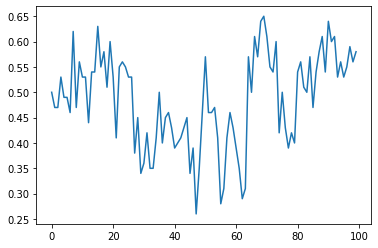

In [ ]:
# Plot of winning rates against combination indices
x=np.arange(100)
plt.plot(x,WIN_rates)
plt.title('Trend of Winning Rates')
plt.xlabel('Combination Index')
plt.ylabel('Winning Rate')
plt.show()

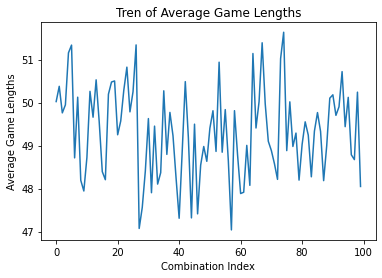

In [ ]:
# Plot of average game lengths against combination indices
plt.plot(x,GAME_lengths)
plt.title('Tren of Average Game Lengths')
plt.xlabel('Combination Index')
plt.ylabel('Average Game Lengths')
plt.show()

In [ ]:
# Sort the winning rates and find the top 10 and their indices
TOP_10_WIN_rates=np.sort(WIN_rates)[::-1][:10]
TOP_10_indices=np.argsort(WIN_rates)[::-1][:10]
BOT_10_WIN_rates=np.sort(WIN_rates)[:10]

In [ ]:
# TOP 10 winning rates
TOP_10_WIN_rates

array([0.65, 0.64, 0.64, 0.63, 0.62, 0.61, 0.61, 0.61, 0.61, 0.6 ])

Winning rate can go as high as around 65% with the optimal combination of 6 players.

In [ ]:
# TOP 10 winning rates' indices
TOP_10_indices

array([69, 90, 68, 15,  7, 70, 88, 66, 92, 91])

In [ ]:
# BOTTOM 10 winning rates
BOT_10_WIN_rates

array([0.26, 0.28, 0.29, 0.31, 0.31, 0.34, 0.34, 0.35, 0.35, 0.35])

Winning rate can go as low as around 26% with the worst combination of 6 players.

In [ ]:
# Game Length of the TOP 10 combinations in seconds
GAME_lengths[TOP_10_indices]

array([49.09958751, 50.18034884, 49.97066989, 48.39333398, 50.12509889,
       48.88299736, 48.99493827, 50.02272185, 49.90239333, 49.70278875])

In [ ]:
# Check the mean and interval of the game lengths in seconds
mean=np.mean(GAME_lengths)
print('Mean average game length: ',mean)
lower=np.mean(GAME_lengths)-1.96*np.std(GAME_lengths,ddof=1)/(100)**0.5
upper=np.mean(GAME_lengths)-1.96*np.std(GAME_lengths,ddof=1)/(100)**0.5
print('95% confidence interval of the average game length: ', [lower, upper])

Mean average game length:  49.316340999386654
95% confidence interval of the average game length:  [49.11161144533354, 49.11161144533354]


In [ ]:
print([np.min(GAME_lengths),np.max(GAME_lengths)])

[47.0383364105147, 51.63538620189045]


In [ ]:
# The combination of 6 players matters a lot to the WINNINT RATES.

# However, the game lengths after running the optimization process turns out to be trivial.
# Because the 95% confidence interval are too small.
# The combinations with top 10 winning rates basically have the same game length in seconds.
# So we will just pick the combination of 6 players with the highes WINNING RATE
combo=TOP_10_indices[0]
print('The best combination of 6 players is below: ')
for player in combinations[combo]:
  print(player['Name'])

The best combination of 6 players is below: 
Kyle Piekarski
Quinn Isaacson
Rado Parapunov
Timothy McIntosh
Frederico Santos
Liam Maxwell


# Alternative Model that Michael tried

Michael Grandel, Dec 28

Let's build the simulation! Note all the assumptions we are making.

A volleyball court has dimensions of 60m x 30m.

Lets start with a service should take about 1 second to travel to it's destination. It will travel along a line. So when a service happens, we can randomly pick a location it will land at the back-end of the opposing court (lets assume only the back-passers will get the ball). 

Now let's say every player has some 'radius' to which they will be able to recieve the ball. Given the size of the court, that radius is typically 2m. 

So, as the ball travels, we calculate the distance between the ball and every player in the back. If the distance is $\leq 2$, we calculate the probability that player will get the ball. If the player does not succeed, the team loses the point. So, we assume that the first and closest player will always be the one expected to get the ball. 

In [ ]:
#Now we define the classes we will use to help us write neater code.

###################
class Player:
  # x, y are starting coordinates

  def __init__(self, x, y, skills):
    self.x = x
    self.y = y
    self.skills = skills

  def get_loc(self):
    return (self.x, self.y)

###################
class Ball:
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def get_loc(self):
    return (self.x, self.y)
  
  def set_dest(self, xd, yd):
    self.xd = xd
    self.yd = yd
  
  def get_dest(self):
    return (self.xd, self.yd)

  def set_loc(self, x, y):
    self.x = x
    self.y = y


'''
1. Now, let's generate the field. Let's assume for now that the 6 players
we have are facing themselves

2.
Court is 60 x 30 (x-coord by y-coord)
Net is therefore at x = 30
Half of court1: x = 15
Half of court2: x = 45

3. Let's find the best setter, and let them be the setters
Then the best blocker be the middle. The rest can be random.

The setter is easy - we set the best one to have success rate of 0.95
'''

best_setter = None
best_middle = None
block_rate = 0

# Find setter first, since they cannpt be the middle too
for player in player_skills:
  skills = player_skills[player]

  if skills['Set']['Success Rate'] == 0.95:
    best_setter = player
    break

for player in player_skills:
  skills = player_skills[player]
  b = skills['Block']['Success Rate']

  if b > block_rate and player != best_setter:
    block_rate = b
    best_middle = player

# Now we can set up the system
# Setter for team 1 (left side) starts at bottom right corner
# thats at x = 15 + 15/2, y = 15 - 15/2
# 
# Middle starts at front middle:
# x = 15 + 15/2, y = 15

Team1 = {"setter": Player(15+15/2, 15-15/2, player_skills[best_setter]),
         "middle": Player(15+15/2, 15, player_skills[best_middle])}

# Lets get 2 random outsides and opposites

randoms = []  #first 2 = outside, next 1 = opposite, next 1 is other middle
for player in player_skills:
  if player != best_middle and player != best_setter:
    randoms.append(player)

Team1["outside"] = Player(15+15/2, 15+15/2, player_skills[randoms[0]])
Team1["outside2"] = Player(15-15/2, 15-15/2, player_skills[randoms[1]])
Team1["opposite"] = Player(15-15/2, 15+15/2, player_skills[randoms[2]])
Team1["middles2"] = Player(15-15/2, 15, player_skills[randoms[3]])

# Lets assume the second team is just like the first team too.

Team2 = {"setter": Player(45-15/2, 15+15/2, player_skills[best_setter]),
         "middle": Player(45-15/2, 15, player_skills[best_middle])}

Team2["outside"] = Player(45-15/2, 15-15/2, player_skills[randoms[0]])
Team2["outside2"] = Player(45+15/2, 15+15/2, player_skills[randoms[1]])
Team2["opposite"] = Player(45+15/2, 15-15/2, player_skills[randoms[2]])
Team2["middles2"] = Player(45+15/2, 15, player_skills[randoms[3]])

# Now lets also make the ball. Let's have it start with outside2, hence
# Team1 serves first. The serivce will happen just behind the bottom right 
# corner of their field

volleyball = Ball(-1, 1)

In [ ]:
##### Now that we have all the variables set up, we shall define how all the
##### functions will change the coordinates of the ball

def serve(volleyball, player_skills, team):
  # Lets see if successful serve
  u = np.random.rand()
  e = player_skills['Service']['Error Rate']
  a = player_skills['Service']['Ace Rate']

  if u <= e:
    return 1; # 0 indicates fail
  
  if u > e and u <= a + e:
    return 2; # 1 indicates ace
  
  # otherwise, successful serve
  
  if team == 1:
    # Serving to team 2, so a random coordinate between their back-half
    l, r = 45,60
  elif team == 2:
    # Serving to team 1...
    l, r = 0,15
  
  # Assume a uniform serving destination
  xd = np.random.uniform(l, r)
  yd = np.random.uniform(0, 30)

  volleyball.set_dest(xd, yd)
  return 0

##### Now we should do a pass (or dig, since python issue with word pass)

def dig(volleyball, player_skills, team):
  
  # Lets see if successful serve
  u = np.random.rand()
  e = player_skills['Pass']['Error Rate']

  if u <= e:
    return 1; # 0 indicates fail
  
  # otherwise, successful pass
  
  if team == 1:
    # Pass to setter
    volleyball.set_dest(15+15/2, 15-15/2)
  elif team == 2:
    volleyball.set_dest(45-15/2, 15+15/2)

  return 0


#### Set

def set(volleyball, player_skills, team):
  # Lets see if successful serve
  u = np.random.rand()
  e = player_skills['Set']['Error Rate']

  if u <= e:
    return 1, None; # 0 indicates fail
  
  # otherwise, successful set
  
  # set to a random hitter
  u = np.random.randint(1, 3)

  if team == 1:
    if u == 1: #to middle
      volleyball.set_dest(15+15/2, 15)
      hitter = "middle"
    else: #to outside
      volleyball.set_dest(15+15/2, 15+15/2)
      hitter = "outside"
    

  elif team == 2:

    if u == 1: #to middle
      volleyball.set_dest(45-15/2, 15)
      hitter = "middle"
    else:
      volleyball.set_dest(45-15/2, 15-15/2)
      hitter = "outside"


  return 0, hitter


#### Attack

def attack(volleyball, player_skills, team):
  # Lets see if successful serve
  u = np.random.rand()
  e = player_skills['Attack']['Error Rate']
  k = player_skills['Attack']['Kill Rate']

  if u <= e:
    return 1; # 1 indicates fail
  
  elif u > e and u <= e + k:
    return 2; # Indicates a kill - no chance for opponents to respond

  # otherwise, success
  
  # hit to a random location on opposite side
  
  if team == 1:
    l, r = 30, 60
  elif team == 2:
    l, r = 0, 30
  
  xd = np.random.uniform(l, r)
  yd = np.random.uniform(0, 30)
  volleyball.set_dest(xd, yd)

  return 0

#### Block
def block(volleyball, player_skills):
  
  # Lets see if successful serve
  u = np.random.rand()
  e = player_skills['Block']['Error Rate']
  a = player_skills['Block']['Assist Rate']

  if u <= e:
    return 1; # 1 indicates fail
  
  elif u > e and u <= e + a:
    return 2; # Indicates an assist - block did nothing
  
  else:
    return 0; # Indicates successful block

In [ ]:
### Now we can simulate one round
def sim_round(volleyball, team1, team2, score, serving_team):
  
  teams = [team1, team2]
  
  i = serving_team
  team = teams[i-1]
  op_team = 1 + i%2

  serv_res = serve(volleyball, team["outside2"].skills, serving_team)

  if serv_res == 2: #ace
    score[serving_team] += 1
    return

  elif serv_res == 1: #fail
    score[op_team] += 1 #Note, this is actually opposing team
    return 

  # Else, serve succeeds. Proceed to loop

  hitter = None

  while (True):
      i = 1 + i%2
      team = teams[i-1]
      op_team = 1 + i%2

      # Block only if not just served. This is reflected by if there was a hitter.
      # The same 'hitter' on the opposing team will block the hitter.
      if hitter != None:

        block_res = block(volleyball, team[hitter].skills)
        if block_res == 1:
          score[op_team] += 1
          return
        elif block_res == 0:
          score[i] += 1
          return
        
      interceptor = intercept(volleyball, team, True)

      if interceptor == None:
        score[op_team] += 1
        return 
      
      # Otherwise, there is an interceptor
      ix, iy = team[interceptor].get_loc()
      volleyball.set_loc(ix, iy)

      dig_res = dig(volleyball, team[interceptor].skills, i)
      
      if dig_res == 1:
        score[op_team] += 1
        return
      
      # Dig success. So set the volleyball location to its destination
      x, y = volleyball.get_dest()
      volleyball.set_loc(x, y)

      set_res, hitter = set(volleyball, team["setter"].skills, i)

      if set_res == 1:
        score[op_team] += 1
        return

      # Set success. So set the volleyball location to its destination
      x, y = volleyball.get_dest()
      volleyball.set_loc(x, y)

      atk_res = attack(volleyball, team[hitter].skills, i)

      if atk_res == 1:
        score[op_team] += 1
        return
      
      elif atk_res == 2:
        score[i] +=1
        return 
      
      # Else, attack succeeds and isn't a kill, so continue to the block for
      # the next team



def intercept(volleyball, players, serve_flag):

  x0, y0 = volleyball.get_loc()
  xd, yd = volleyball.get_dest()

  # We can figure out the closest person
  # along the trajectory. This is simple geometry/projections

  x1 = np.array([x0, y0])
  x2 = np.array([xd, yd])
  
  closest_d = 4 # Any one closer
  closest_p = None

  for player in players:

    # We ignore the front players
    if serve_flag and player == "setter" or player == "middle" or player == "outside":
      continue

    px, py = players[player].get_loc()
    p = np.array([px, py])

    # projection formula
    d = np.linalg.norm( np.cross((x2-x1), (x1-p)) ) / np.linalg.norm(x2-x1)

    if d <= closest_d:
      closest_d = d
      closest_p = player

  return closest_p
    


# Example  
score = {1:0, 2:0}

sim_round(volleyball, Team1, Team2, score, 1)
print(score)

{1: 1, 2: 0}


In [ ]:
# Now, lets simulate a game till 25 points, and see which team wins!

def simulate_game(volleyball, team1, team2, score, starting_team):
  s1 = score[1]
  s2 = score[2]
  i = starting_team
  while (not s1 == 25 and not s2 == 25):
    sim_round(volleyball, team1, team2, score, i)
    i = 1 + i%2
    s1 = score[1]
    s2 = score[2]

score = {1:0, 2:0}
simulate_game(volleyball, Team1, Team2, score, 1)
print(score)

{1: 12, 2: 25}


You may simulate the game many times now and see distributions of the score for your team! This will allow you to make optimal decisions. 

Below, we have another implementation and that one will also take the next step of optimizing.